In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Nhận diện top 10 món ăn



In [19]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [13]:
# Thiết lập dữ liệu
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [14]:
# Lấy dữ liệu và đồng thời thiết lập ảnh 150x150
training=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Top10MonAn',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 189 images belonging to 10 classes.


In [15]:
training.class_indices

{'BanhKhot': 0,
 'BanhMi': 1,
 'BanhXeo': 2,
 'BunCha': 3,
 'BunRieu': 4,
 'CaPheTrung': 5,
 'Che': 6,
 'ChuoiNepNuong': 7,
 'GoiCuon': 8,
 'Pho': 9}

In [16]:
x_train,y_train=next(training)
print(x_train.shape)
print(y_train.shape)

(32, 150, 150, 3)
(32, 10)


In [17]:
# Chuẩn hóa dữ liệu
x_train=x_train.astype ('float32')

In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(150, 150 ,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [56]:
# Biên dịch 
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=["accuracy"])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣20 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(x_train,y_train,epochs=100, batch_size=32,verbose=1)#, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])


Epoch 1/100
1/1 [==============================] - 1s 656ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0000e+

In [57]:
#Độ chính xác
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0
Train Accuracy 1.0


In [58]:
# Lưu dữ liệu đã train
model.save('Top10MonAn_model.h5')

model=load_model('Top10MonAn_model.h5')
classes = ['BanhKhot', 'BanhMi', 'BanhXeo','BunCha', 'BunRieu' 'CaPheTrung', 'Che', 'ChuoiNepNuong', 'GoiCuon', 'Pho']

Pho


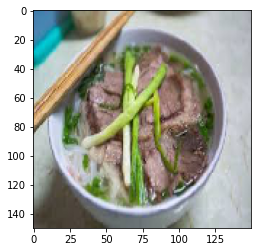

In [84]:
#Test dữ liệu
img=load_img('/content/drive/MyDrive/Colab Notebooks/Top10MonAn/Pho/Pho (12).jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
result=model.predict(img)
if round(result[0][0])==1:
  prediction='BanhKhot'
if round(result[0][1])==1:
  prediction='BanhMi'
if round(result[0][2])==1:
  prediction='BanhXeo'
if round(result[0][3])==1:
  prediction='BunCha'
if round(result[0][4])==1:
  prediction='BunRieu'
if round(result[0][5])==1:
  prediction='CaPheTrung'
if round(result[0][6])==1:
  prediction='Che'
if round(result[0][7])==1:
  prediction='ChuoiNepNuong'
if round(result[0][8])==1:
  prediction='GoiCuon'
if round(result[0][9])==1:
  prediction='Pho'
print(prediction)